# Performance of OLS Emulator

- This script shows the performance of Linear Regression with Ordinary Least Squares (OLS)

In [1]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pickle
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import gc
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Calculate squared_error
def squared_error(y_ori,y_pred):
    return np.sum((y_pred - y_ori) * (y_pred - y_ori))

# Calculate coefficient of determination
def coefficient_of_determination(y_ori,y_pred):
    """
    ref: https://en.wikipedia.org/wiki/Coefficient_of_determination
    """
    y_mean_pred = np.full(np.asarray(y_ori).shape, np.mean(y_ori)) 
    SSres = squared_error(y_ori, y_pred)
    SStot = squared_error(y_ori, y_mean_pred)
    return 1 - (SSres/SStot)

# Calculate index of agreement
def index_agreement(ori,pred):
    """
    ref: https://www.rforge.net/doc/packages/hydroGOF/d.html
    index of agreement
    input:
        pred: simulated
        ori: observed
    output:
        ia: index of agreement
    """
    ia = 1 -(np.sum((ori-pred)**2))/(np.sum(
        (np.abs(pred-np.mean(ori))+np.abs(ori-np.mean(ori)))**2))
    return ia

In [2]:
vari = ["DMS_SRF","H2O2_SRF","H2SO4_SRF","O3_SRF","SO2_SRF","SOAG_SRF",
        'Mass_so4','Mass_bc','Mass_ncl','Mass_dst','Mass_pom','Mass_soa',
        "T", "RELHUM", "SZA"]
ms = ['chi_abd','chi_opt1','chi_opt3','chi_hyg']
vari_ms = vari+ms

df_test_ori = pd.read_csv("../data/test.csv")
#df_test.describe()

df_train_ori = pd.read_csv("../data/train.csv")
#df_train.describe()

In [3]:
def predict_chi_ls(df_train, df_test, vari, chi_ls):
    X_train = df_train[vari]
    X_test = df_test[vari]

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_new = scaler.transform(X_train)
    X_test_new = scaler.transform(X_test)
    X_test2 = sm.add_constant(X_test_new)

    for pred in chi_ls:
        print(pred)
        #y_train = df_train[pred]
        Y_ref = df_test[pred]
        reg=pickle.load(open("./linear_model/"+pred+".dat","rb"))
        df_predictions = reg.predict(X_test2)
        
        plt.figure(figsize=(10,10))
        plt.scatter(df_predictions,Y_ref,s = 6,color="purple",alpha=0.5)
        plt.plot([0,1],[0,1],color="red",alpha=0.6)
        plt.ylabel("Reference",fontsize=20)
        plt.xlabel("Prediction",fontsize=20)
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()
        
        print('The P-value is:',
              "{0:.3f}".format(reg.f_pvalue))
        print('The cc is:',
              "{0:.3f}".format(np.corrcoef(np.asarray(Y_ref),np.asarray(df_predictions))[0][1]))
        print('The coefficient of determination is:',
              "{0:.3f}".format(coefficient_of_determination(Y_ref,df_predictions)))
        print('The coefficient of determination (Using sklearn) is:', 
              "{0:.3f}".format(metrics.r2_score(Y_ref, df_predictions)))
        print('The index of agreement is:',
              "{0:.3f}".format(index_agreement(Y_ref,df_predictions)))
        print('The root mean squared error is:', 
              "{0:.3f}".format(np.sqrt(mean_squared_error(Y_ref, df_predictions))))
        print('The mean absolute error is:', 
              "{0:.3f}".format(metrics.mean_absolute_error(Y_ref, df_predictions)))
        print('The median absolute error is:', 
              "{0:.3f}".format(metrics.median_absolute_error(Y_ref, df_predictions)))
        print("####################################")
        print("\n")

## Apply the training data

chi_abd


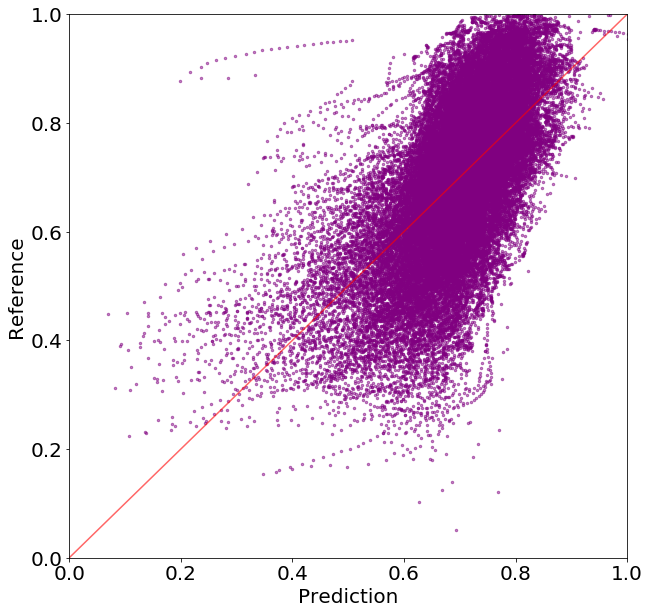

The P-value is: 0.000
The cc is: 0.632
The coefficient of determination is: 0.399
The coefficient of determination (Using sklearn) is: 0.399
The index of agreement is: 0.742
The root mean squared error is: 0.119
The mean absolute error is: 0.095
The median absolute error is: 0.081
####################################


chi_opt1


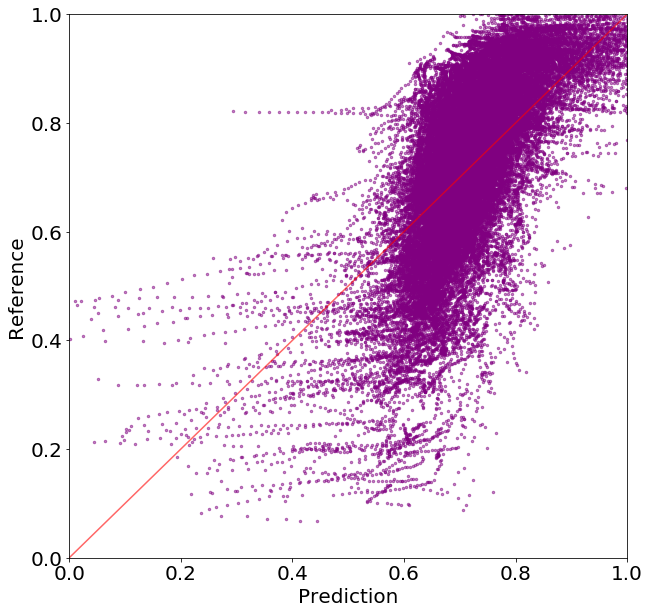

The P-value is: 0.000
The cc is: 0.660
The coefficient of determination is: 0.436
The coefficient of determination (Using sklearn) is: 0.436
The index of agreement is: 0.767
The root mean squared error is: 0.125
The mean absolute error is: 0.097
The median absolute error is: 0.082
####################################


chi_opt3


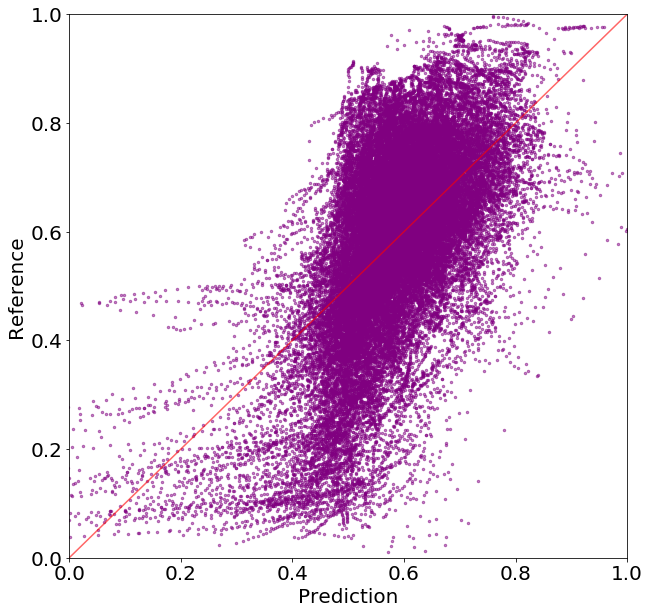

The P-value is: 0.000
The cc is: 0.604
The coefficient of determination is: 0.365
The coefficient of determination (Using sklearn) is: 0.365
The index of agreement is: 0.718
The root mean squared error is: 0.143
The mean absolute error is: 0.112
The median absolute error is: 0.090
####################################


chi_hyg


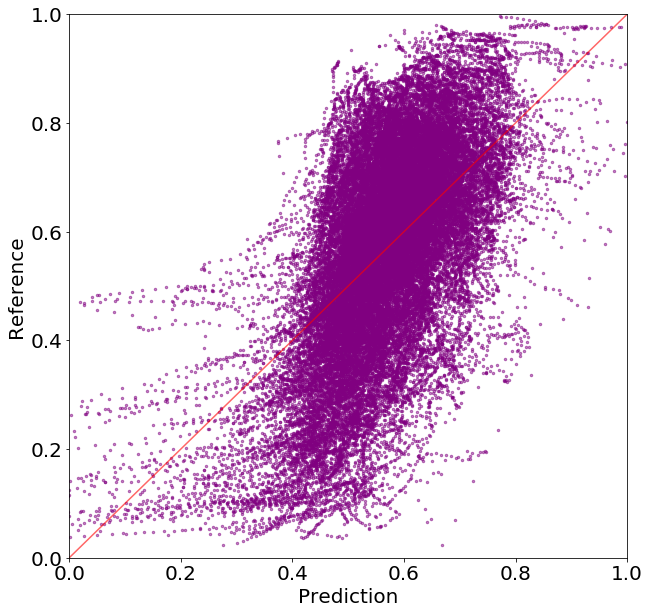

The P-value is: 0.000
The cc is: 0.596
The coefficient of determination is: 0.355
The coefficient of determination (Using sklearn) is: 0.355
The index of agreement is: 0.711
The root mean squared error is: 0.152
The mean absolute error is: 0.121
The median absolute error is: 0.101
####################################




In [4]:
predict_chi_ls(df_train=df_train_ori.dropna(), df_test=df_train_ori.dropna(), vari=vari, chi_ls=ms)

## Apply to testing data

chi_abd


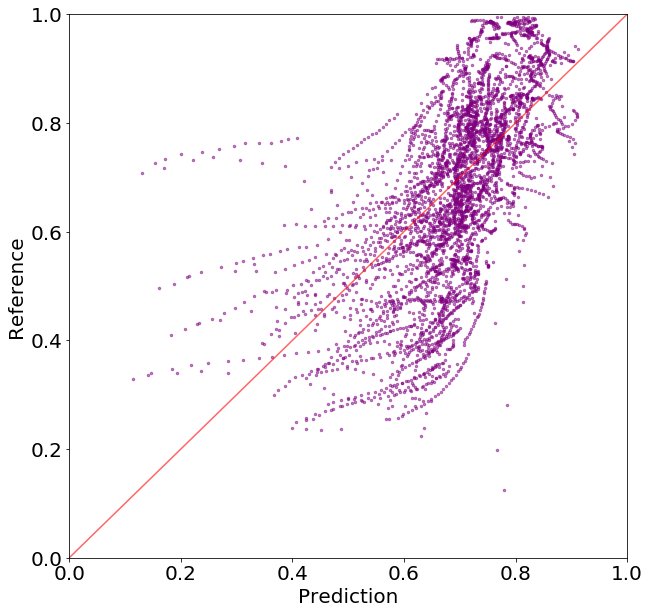

The P-value is: 0.000
The cc is: 0.622
The coefficient of determination is: 0.379
The coefficient of determination (Using sklearn) is: 0.379
The index of agreement is: 0.726
The root mean squared error is: 0.137
The mean absolute error is: 0.108
The median absolute error is: 0.088
####################################


chi_opt1


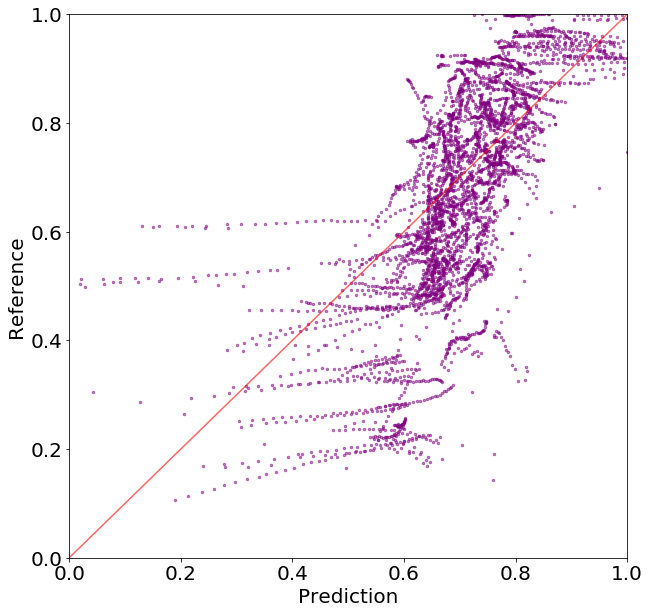

The P-value is: 0.000
The cc is: 0.680
The coefficient of determination is: 0.434
The coefficient of determination (Using sklearn) is: 0.434
The index of agreement is: 0.783
The root mean squared error is: 0.152
The mean absolute error is: 0.116
The median absolute error is: 0.093
####################################


chi_opt3


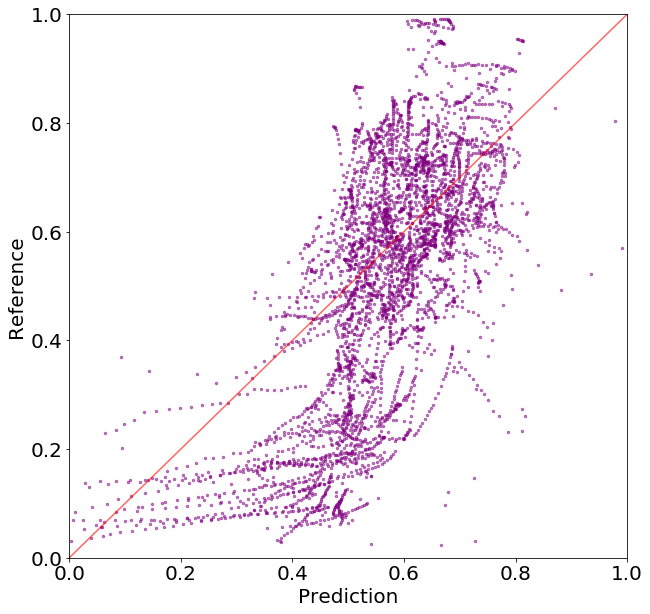

The P-value is: 0.000
The cc is: 0.612
The coefficient of determination is: 0.332
The coefficient of determination (Using sklearn) is: 0.332
The index of agreement is: 0.727
The root mean squared error is: 0.188
The mean absolute error is: 0.147
The median absolute error is: 0.118
####################################


chi_hyg


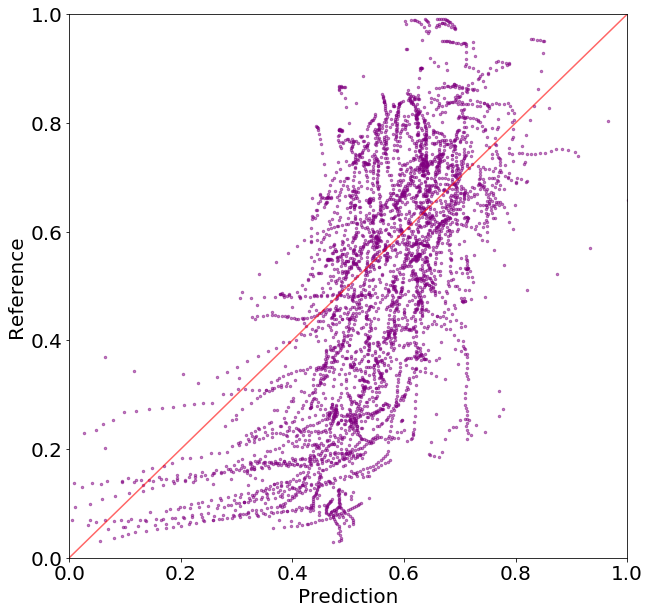

The P-value is: 0.000
The cc is: 0.599
The coefficient of determination is: 0.315
The coefficient of determination (Using sklearn) is: 0.315
The index of agreement is: 0.721
The root mean squared error is: 0.195
The mean absolute error is: 0.156
The median absolute error is: 0.134
####################################




In [5]:
predict_chi_ls(df_train=df_train_ori.dropna(), df_test=df_test_ori.dropna(), vari=vari, chi_ls=ms)